In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

import warnings 
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv(r'C:\Users\Apoorva\Documents\Web Dev Folder\loan\Loan_predict_model-main\data_Loan.csv')

In [9]:
data.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [10]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
data.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
print(data.Credit_History.value_counts())
print('\n \x1b[0;33;93m Missing value Percentage {0}%'.format(round(100*(data.Credit_History.isnull().sum()/len(data)),3)))

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

  Missing value Percentage 0.0%


In [13]:
data.Credit_History.fillna(1.0 , inplace = True)

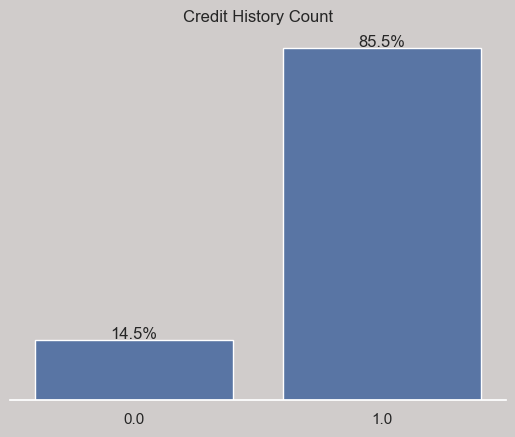

In [14]:
sns.set_theme(style = 'dark')
fig , ax = plt.subplots(facecolor = ('#D0CCCB'))
ax.set_facecolor('#D0CCCB')
ax = plt.title('Credit History Count' , )
ax = sns.despine(right = True , top = True , left = True )
ax = sns.countplot(data = data, x = 'Credit_History')

for p in ax.patches:
    count = '{:.1f}%'.format(round(100*(p.get_height().astype('int')/len(data)),1))
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height() + 2.5*p.get_width()
    plt.annotate(count , (x,y) , ha = 'center')
ax = plt.yticks([])
ax = plt.ylabel('')
ax = plt.xlabel('')

In [15]:
gender = data.Credit_History.unique()
gender_up=[]
for index,value in enumerate(gender):
    if value == 1.0:
        gender_up.append('Yes')
    else:
        gender_up.append('No')

gender_up

['Yes', 'No']

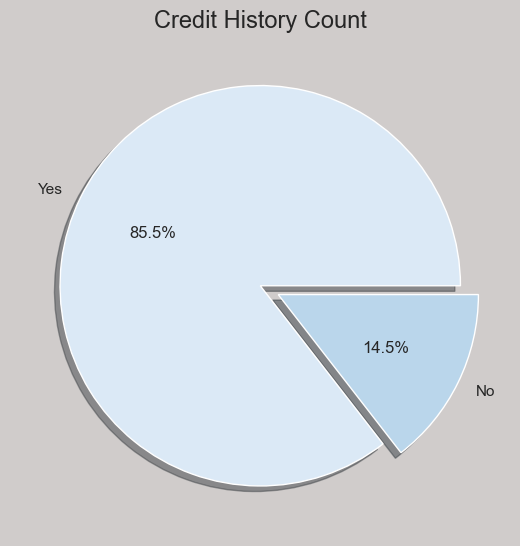

In [16]:
gender = data.Credit_History.unique()
gender_up=[]
for index,value in enumerate(gender):
    if value == 1.0:
        gender_up.append('Yes')
    else:
        gender_up.append('No')


gender_data = data.Credit_History.value_counts().tolist()
fig , ax = plt.subplots(figsize = (10,6.5) , facecolor = ('#D0CCCB'))
palette_color = sns.color_palette('Blues')
explode = [0,0.1]
ax = plt.pie(gender_data, labels=gender_up , colors = palette_color, explode = explode , autopct='%.1f%%',
    shadow=True);
ax = plt.title('Credit History Count' , fontsize = 17  )

In [17]:
gender_up

['Yes', 'No']

In [24]:
# fig = px.pie(data, values ='Credit_History' , names =  'Credit_History' )
# fig.show()

import plotly.graph_objects as go


# pull is given as a fraction of the pie radius
colors = ['LightSkyBlue','LightSteelBlue']
fig = go.Figure(data=[go.Pie( labels = gender_up,hole=0.2,  values= gender_data, pull=[0, 0.2] )])
fig.update_traces(showlegend=False , marker=dict(colors=colors))
fig.update_layout(
    title_text="Credit History Count",
    title_x=0.5,  # Set the title's x position to center
    title_y=0.9,  # Set the title's y position (adjust as needed)
    title_font_size=18 ,
    plot_bgcolor='rgba(0, 0, 0, 0)',   # Plot area background
    paper_bgcolor='rgba(0,0,0,0)'
)
fig.update_layout(margin=dict(t=80, b=0, l=0, r=0))
fig.show()
fig.write_html("plotly_graph.html")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
data.Credit_History.value_counts()

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

In [25]:
print(data.Self_Employed.value_counts())
print('\n \x1b[0;33;93m Missing value Percentage {0}%'.format(round(100*(data.Self_Employed.isnull().sum()/len(data)),3)))

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

  Missing value Percentage 5.212%


In [27]:
data.Self_Employed.fillna('No' , inplace = True)

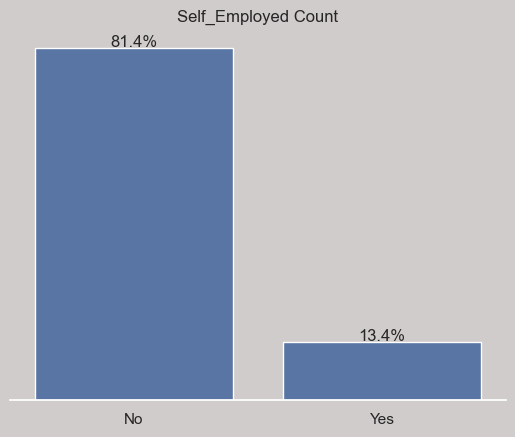

In [26]:

fig , ax = plt.subplots(facecolor = ('#D0CCCB'))
ax.set_facecolor('#D0CCCB')
ax = plt.title('Self_Employed Count')
ax = sns.despine(right = True , top = True , left = True )
ax = sns.countplot(data = data, x = 'Self_Employed')
for p in ax.patches:
    count = '{:.1f}%'.format(round(100*(p.get_height().astype('int')/len(data)),1))
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height() + 2.5*p.get_width()
    plt.annotate(count , (x,y) , ha = 'center')
ax = plt.yticks([])
ax = plt.ylabel('')
ax = plt.xlabel('')

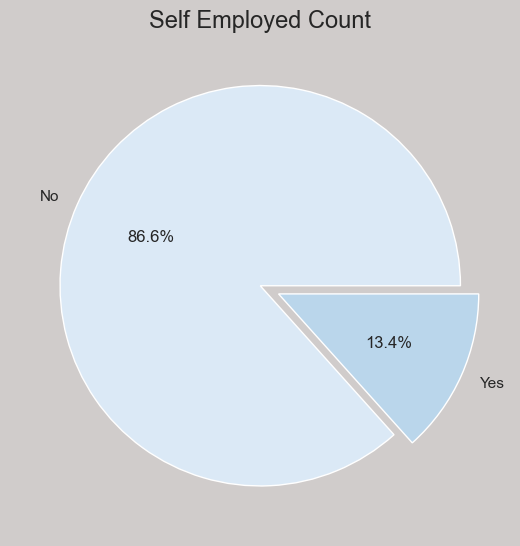

In [28]:
gender_data = data.Self_Employed.value_counts().tolist()
gender = data.Self_Employed.unique()
fig , ax = plt.subplots(figsize = (10,6.5) , facecolor = ('#D0CCCB'))
palette_color = sns.color_palette('Blues')
explode = [0,0.1]
ax = plt.pie(gender_data, labels=gender , colors = palette_color, explode = explode , autopct='%.1f%%');
ax = plt.title('Self Employed Count' , fontsize = 17  )

In [29]:
colors = ['LightSkyBlue','LightSteelBlue']
fig = go.Figure(data=[go.Pie( labels = gender_up,hole=0.2,  values= gender_data, pull=[0, 0.2] )])
fig.update_traces(showlegend=False , marker=dict(colors=colors))
fig.update_layout(
    title_text="Self Employed Count",
    title_x=0.5,  # Set the title's x position to center
    title_y=0.9,  # Set the title's y position (adjust as needed)
    title_font_size=18 ,
    plot_bgcolor='rgba(0, 0, 0, 0)',   # Plot area background
    paper_bgcolor='rgba(0,0,0,0)'
)
fig.update_layout(margin=dict(t=80, b=0, l=0, r=0))
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [30]:
print(data.LoanAmount.value_counts())
print('\n \x1b[0;33;93m Missing value Percentage {0}%'.format(round(100*(data.LoanAmount.isnull().sum()/len(data)),3)))

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

  Missing value Percentage 3.583%


Text(0.5, 0, 'LoanAmount')

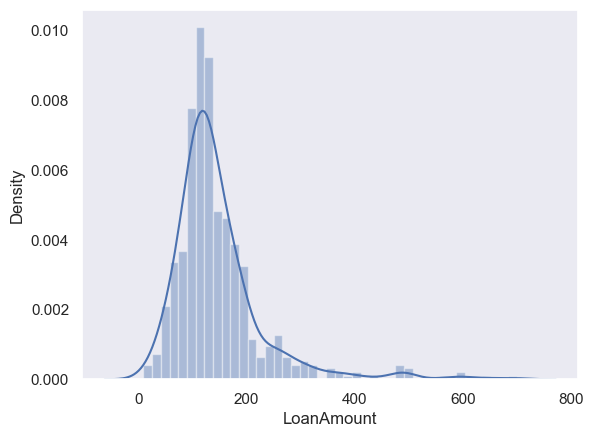

In [31]:
sns.distplot( x = data['LoanAmount'] )
plt.xlabel('LoanAmount')

In [32]:
data.LoanAmount.median()

128.0

In [33]:
data.LoanAmount.fillna(128.0 , inplace =True)

In [34]:
print(data.Dependents.value_counts())
print('\n \x1b[0;33;93m Missing value Percentage {0}%'.format(round(100*(data.Dependents.isnull().sum()/len(data)),3)))

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

  Missing value Percentage 2.443%


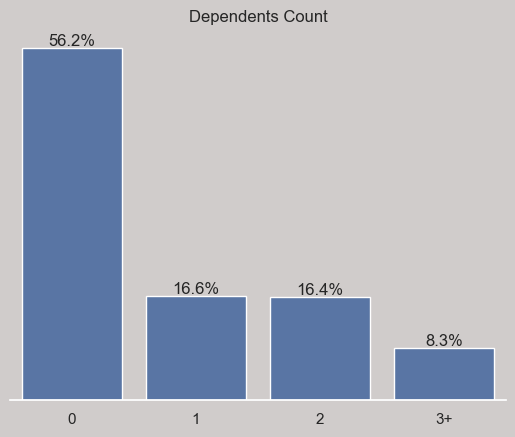

In [35]:
fig , ax = plt.subplots(facecolor = ('#D0CCCB'))
ax.set_facecolor('#D0CCCB')
ax = plt.title('Dependents Count')
ax = sns.despine(right = True , top = True , left = True )
ax = sns.countplot(data = data , x = 'Dependents')
for p in ax.patches:
    count = '{:.1f}%'.format(round(100*(p.get_height().astype('int')/len(data)),1))
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height() + 2.5*p.get_width()
    plt.annotate(count , (x,y) , ha = 'center')
ax = plt.yticks([])
ax = plt.ylabel('')
ax = plt.xlabel('')

In [36]:
data.Dependents = data.Dependents.str.replace('+','')

In [37]:
data.Dependents.fillna(0 , inplace =True)

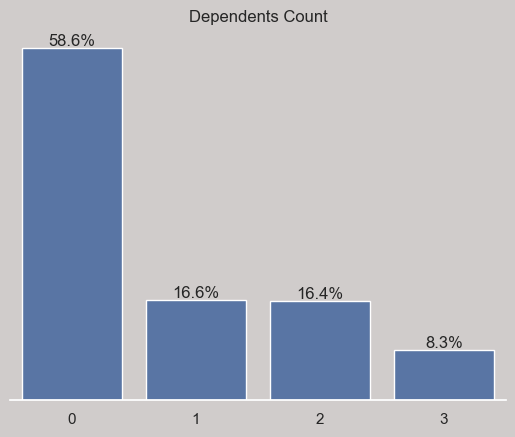

In [39]:
fig , ax = plt.subplots(facecolor = ('#D0CCCB'))
ax.set_facecolor('#D0CCCB')
ax = plt.title('Dependents Count')
ax = sns.despine(right = True , top = True , left = True )
ax = sns.countplot(data = data , x = 'Dependents')
for p in ax.patches:
    count = '{:.1f}%'.format(round(100*(p.get_height().astype('int')/len(data)),1))
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height() + 2.5*p.get_width()
    plt.annotate(count , (x,y) , ha = 'center')
ax = plt.yticks([])
ax = plt.ylabel('')
ax = plt.xlabel('')

In [40]:
data['Dependents'] = data.Dependents.astype('int')

In [41]:
X = []
Y = []
for i in range(0,4):
    X.append(data['Dependents'].value_counts()[i])
    Y.append(i)

In [42]:
fig = px.bar(  x =Y , y =X  , color=Y )
fig.update_layout(title_text='Dependents Count' , title_x=0.5 ,
    plot_bgcolor='rgba(0, 0, 0, 0)',   # Plot area background
    paper_bgcolor='rgba(0,0,0,0)',
    title_font_size=18 ,
    xaxis=dict(title='', showticklabels=True) , 
    yaxis = dict(title='', showticklabels= True))
    
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

  Missing value Percentage 2.28%


<Axes: ylabel='Density'>

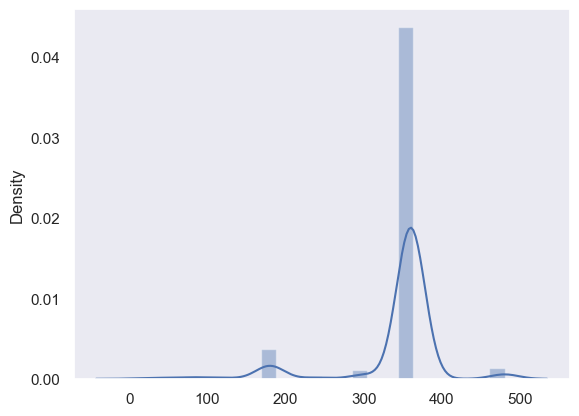

In [43]:
print(data.Loan_Amount_Term.value_counts())
print('\n \x1b[0;33;93m Missing value Percentage {0}%'.format(round(100*(data.Loan_Amount_Term.isnull().sum()/len(data)),3)))

sns.distplot(x = data['Loan_Amount_Term'])

In [44]:
data.Loan_Amount_Term.describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [45]:
data.Loan_Amount_Term.fillna(360.0 , inplace = True)

In [49]:
data.Gender.fillna('Male' , inplace = True)

Gender
Male      502
Female    112
Name: count, dtype: int64

  Missing value Percentage 0.0%


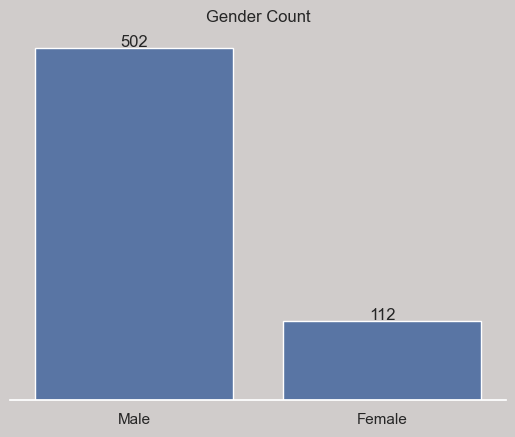

In [50]:
print(data.Gender.value_counts())
print('\n \x1b[0;33;93m Missing value Percentage {0}%'.format(round(100*(data.Gender.isnull().sum()/len(data)),3)))
fig , ax = plt.subplots(facecolor = ('#D0CCCB'))
ax.set_facecolor('#D0CCCB')
ax = plt.title('Gender Count')
ax = sns.despine(right = True , top = True , left = True )
ax = sns.countplot(data =data ,x = 'Gender')
for p in ax.patches:
    count = p.get_height().astype('int')
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height() + 2.5*p.get_width()
    plt.annotate(count , (x,y) , ha = 'center')
ax = plt.yticks([])
ax = plt.ylabel('')
ax = plt.xlabel('')

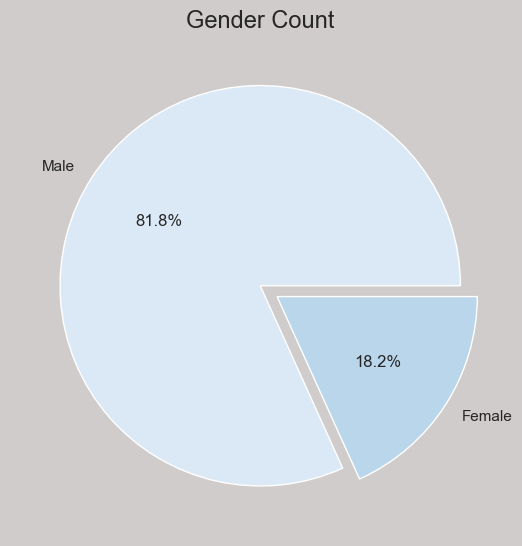

In [51]:
gender_data = data.Gender.value_counts().tolist()
gender = data.Gender.unique()
fig , ax = plt.subplots(figsize = (10,6.5) , facecolor = ('#D0CCCB'))
palette_color = sns.color_palette('Blues')
explode = [0,0.1]
ax = plt.pie(gender_data, labels=gender , colors = palette_color, explode = explode , autopct='%.1f%%');
ax = plt.title('Gender Count' , fontsize = 17  )

In [52]:
colors = ['LightSkyBlue','LightSteelBlue']
fig = go.Figure(data=[go.Pie( labels = gender,  values= gender_data ,hole=0.2, pull=[0, 0.2]  )])
fig.update_traces(showlegend=False , marker=dict(colors=colors))
fig.update_layout(
    title_text="Gender Count",
    title_x=0.5,  # Set the title's x position to center
    title_y=0.9,  # Set the title's y position (adjust as needed)
    title_font_size=18 ,
    plot_bgcolor='rgba(0, 0, 0, 0)',   # Plot area background
    paper_bgcolor='rgba(0,0,0,0)'
)
fig.update_layout(margin=dict(t=80, b=0, l=0, r=0))
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [53]:
data.Married.fillna('Yes' , inplace =True)

Married
Yes    401
No     213
Name: count, dtype: int64

  Missing value Percentage 0.0%


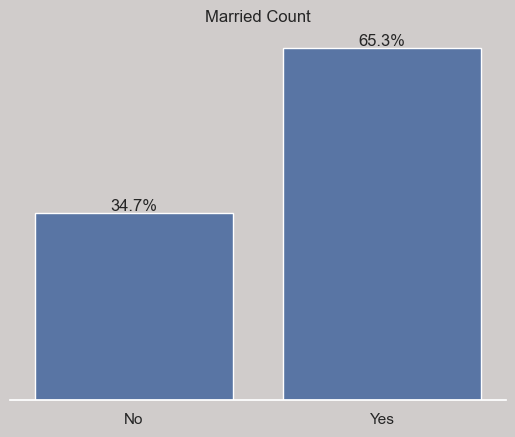

In [54]:
print(data.Married.value_counts())
print('\n \x1b[0;33;93m Missing value Percentage {0}%'.format(round(100*(data.Married.isnull().sum()/len(data)),3)))
fig , ax = plt.subplots(facecolor = ('#D0CCCB'))
ax.set_facecolor('#D0CCCB')
ax = plt.title('Married Count')
ax = sns.despine(right = True , top = True , left = True )
ax = sns.countplot(data =data ,x = 'Married')
for p in ax.patches:
    count = '{:.1f}%'.format(round(100*(p.get_height().astype('int')/len(data)),1))
    x = p.get_x() + p.get_width()/2
    y = p.get_y() + p.get_height() + 2.5*p.get_width()
    plt.annotate(count , (x,y) , ha = 'center')
ax = plt.yticks([])
ax = plt.ylabel('')
ax = plt.xlabel('')

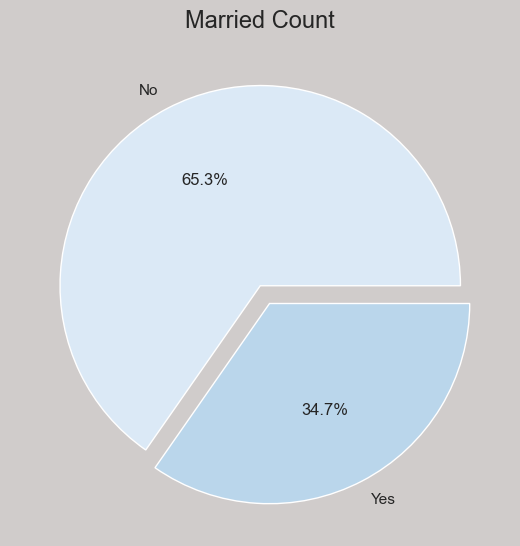

In [55]:
gender_data = data.Married.value_counts().tolist()
gender = data.Married.unique()
fig , ax = plt.subplots(figsize = (10,6.5) , facecolor = ('#D0CCCB'))
palette_color = sns.color_palette('Blues')
explode = [0,0.1]
ax = plt.pie(gender_data, labels=gender , colors = palette_color, explode = explode , autopct='%.1f%%');
ax = plt.title('Married Count' , fontsize = 17  )

In [56]:
colors = ['LightSkyBlue','LightSteelBlue']
fig = go.Figure(data=[go.Pie( labels = gender_up,  values= gender_data ,hole=0.2, pull=[0, 0.2]  )])
fig.update_traces(showlegend=False , marker=dict(colors=colors))
fig.update_layout(
    title_text="Married Count",
    title_x=0.5,  # Set the title's x position to center
    title_y=0.9,  # Set the title's y position (adjust as needed)
    title_font_size=18 ,
    plot_bgcolor='rgba(0, 0, 0, 0)',   # Plot area background
    paper_bgcolor='rgba(0,0,0,0)'
)
fig.update_layout(margin=dict(t=80, b=0, l=0, r=0))
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), int64(1), object(7)
memory usage: 60.1+ KB


In [58]:
obj = (data.dtypes == 'object')
cat_feature = obj[obj].index

SyntaxError: invalid syntax (3133375982.py, line 1)

In [60]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in cat_feature:
    data[i] = le.fit_transform(data[i])

<Figure size 1500x1500 with 0 Axes>

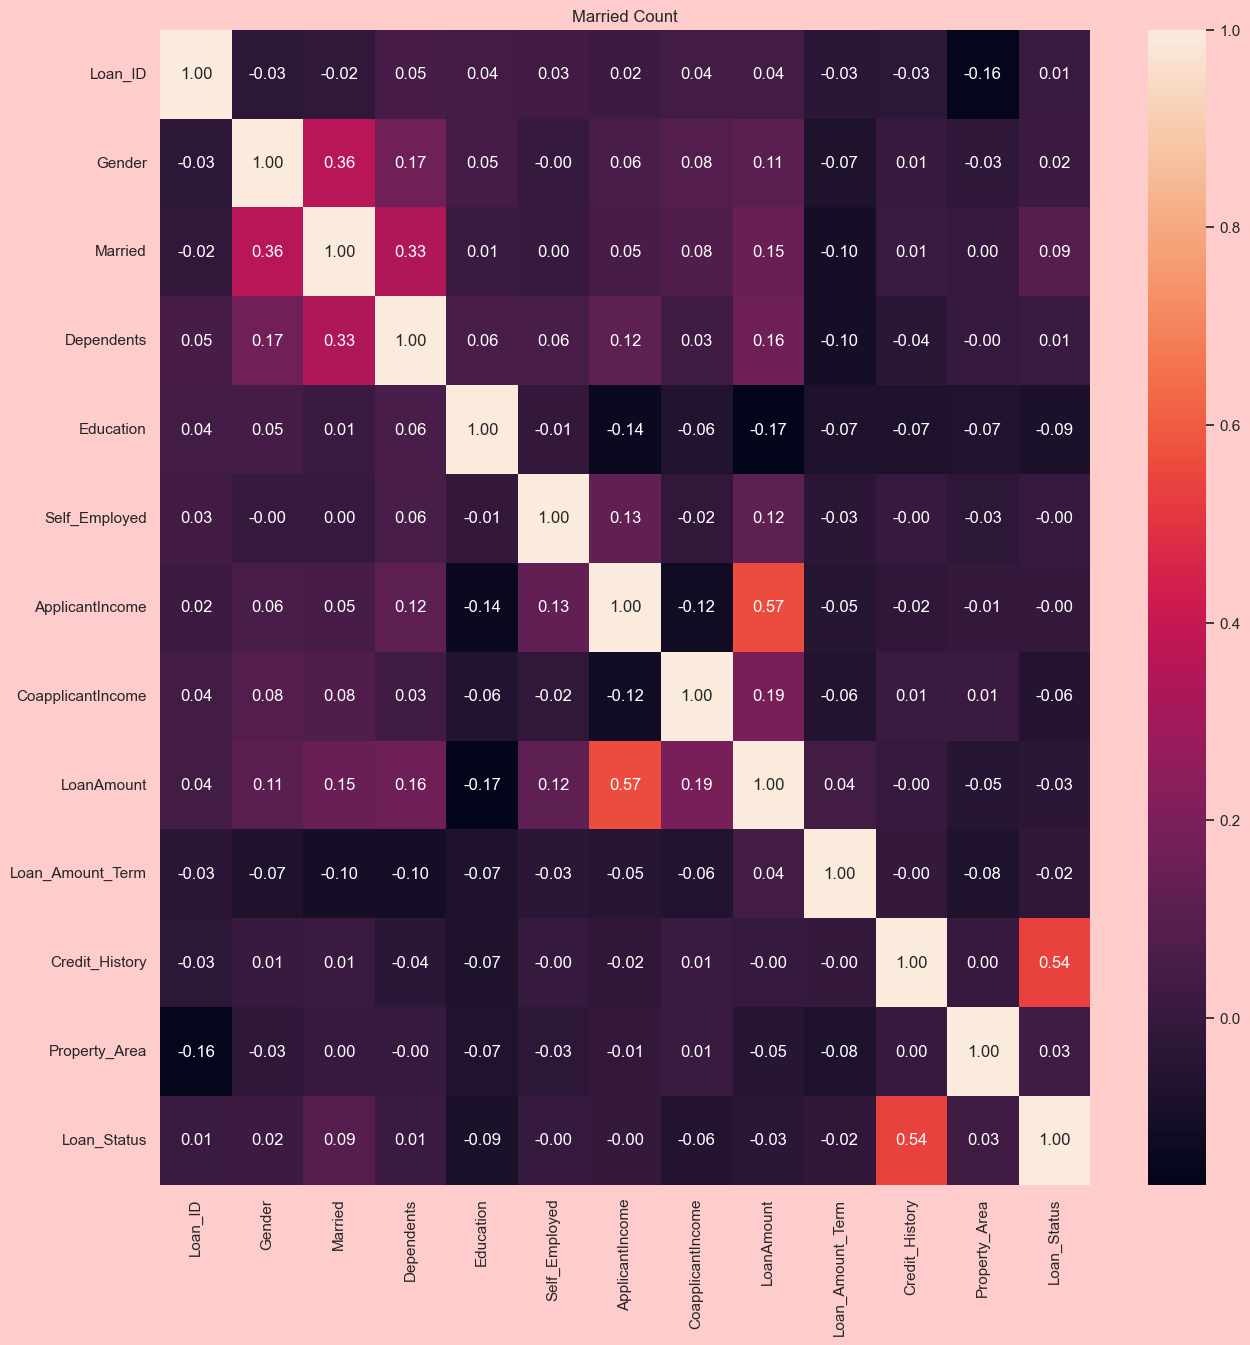

In [61]:
plt.figure(figsize = (15,15)) 
fig , ax = plt.subplots(facecolor = ('#ffcccc') ,figsize = (15,15) )
ax.set_facecolor('#66CDAA')
ax = plt.title('Married Count')
ax = sns.despine(right = True , top = True , left = True )
ax = sns.heatmap(data.corr() , annot = True , fmt = '.2f')

In [62]:
data.drop('Loan_ID' , axis = 1 , inplace = True)

In [63]:
from sklearn.model_selection import train_test_split
x = data.drop('Loan_Status' , axis = 1)
y = data['Loan_Status']

xtrain , xtest , ytrain ,ytest = train_test_split(x , y , test_size = 0.4 , random_state = 1 )

print('\x1b[7;31;96m Shape of XTrain dataset : \033[00m ', xtrain.shape)
print('\x1b[7;31;96m Shape of XTest dataset  : \033[00m ', xtest.shape)
print('\x1b[7;31;96m Shape of YTrain dataset : \033[00m ', ytrain.shape)
print('\x1b[7;31;96m Shape of YTest dataset  : \033[00m ', ytest.shape)

 Shape of XTrain dataset :   (368, 11)
 Shape of XTest dataset  :   (246, 11)
 Shape of YTrain dataset :   (368,)
 Shape of YTest dataset  :   (246,)


In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

knc = KNeighborsClassifier()
rfc = RandomForestClassifier()
svc = SVC(probability =True)
lr = LogisticRegression()

print('\x1b[1;91;32m Train Prediction Accuracy \x1b[00m')
for i in [knc , rfc , svc , lr]:
    model  = i.fit(xtrain,ytrain)
    yprediction_train = model.predict(xtrain)
    print('\n  \x1b[1;94;47m Accuracy Score of',i.__class__.__name__,':\033[00m ','\033[1m',100*accuracy_score(ytrain , yprediction_train),'\033[00m')

 Train Prediction Accuracy 

   Accuracy Score of KNeighborsClassifier :   75.81521739130434 

   Accuracy Score of RandomForestClassifier :   100.0 

   Accuracy Score of SVC :   70.38043478260869 

   Accuracy Score of LogisticRegression :   82.88043478260869 


In [65]:
print('\x1b[1;91;32m Test Prediction Accuracy \x1b[00m')
for i in [knc , rfc , svc , lr]:
    model  = i.fit(xtrain,ytrain)
    yprediction_test = model.predict(xtest)
    print('\n  \x1b[1;94;47m Accuracy Score of',i.__class__.__name__,':\033[00m ','\033[1m',100*accuracy_score(ytest , yprediction_test),'\033[00m')

 Test Prediction Accuracy 

   Accuracy Score of KNeighborsClassifier :   63.82113821138211 

   Accuracy Score of RandomForestClassifier :   76.82926829268293 

   Accuracy Score of SVC :   67.07317073170732 

   Accuracy Score of LogisticRegression :   78.45528455284553 


In [66]:
def confusion_m(Actual , Predicted , Name , flag = False ):
    
    from sklearn import metrics
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
     
    print('\x1b[7;30;47m Confusion matrix Of ' +Name+'\033[00m')
    if flag == True: 
        print("\x1b[0;30;47m \033[1mMODEL PERFORMANCE\x1b[0m")
        print("\x1b[0;30;47m \033[1mAccuracy   : Train:\x1b[0m",
              round(accuracy_score(Actual,Predicted),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m",
              round(accuracy_score(Actual,Predicted),3))
        print("\x1b[0;30;47m \033[1mRecall     : Train:\x1b[0m"
              ,round(recall_score(Actual,Predicted),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m" ,
              round(recall_score(Actual,Predicted),3))
        
        print("\x1b[0;30;47m \033[1mPrecision  : Train:\x1b[0m",
              round(precision_score(Actual,Predicted),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m",
              round(precision_score(Actual,Predicted),3))
        print("\x1b[0;30;47m \033[1mF1         : Train:\x1b[0m",
              round(f1_score(Actual,Predicted),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m",
              round(f1_score(Actual,Predicted),3))
    
    # Making confusion matrix for train and test prediction 
    
    confusion_matrix = metrics.confusion_matrix(Actual,Predicted , labels = [0,1])
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix , display_labels = ['False' ,'True'])
    cm_display.plot()
    plt.show()

 Confusion matrix Of Train
 MODEL PERFORMANCE
 Accuracy   : Train: 0.829  Test: 0.829
 Recall     : Train: 0.984  Test: 0.984
 Precision  : Train: 0.811  Test: 0.811
 F1         : Train: 0.889  Test: 0.889


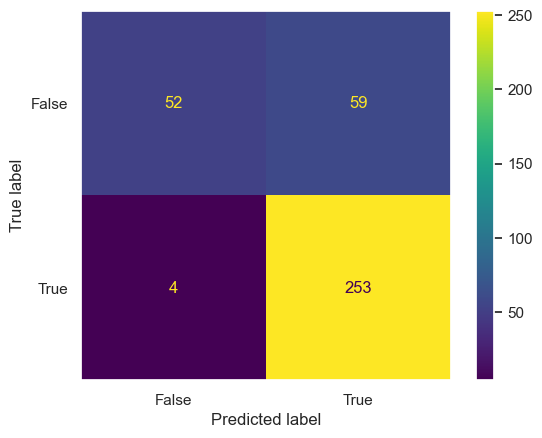

 Confusion matrix Of Test


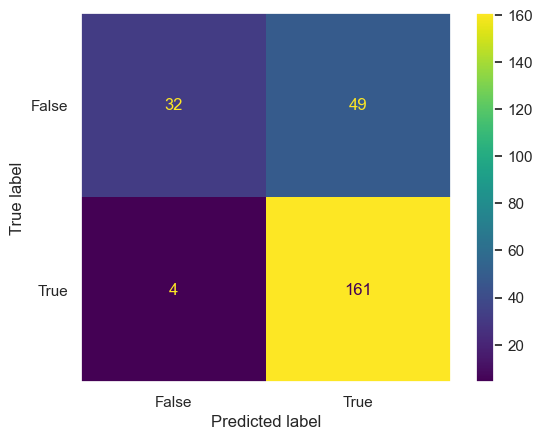

In [67]:
confusion_m(ytrain , yprediction_train ,'Train' ,flag = True)
confusion_m(ytest , yprediction_test ,'Test' )

In [68]:
model  = lr.fit(xtrain,ytrain)
model.predict(xtrain)
import pickle 
pickle.dump(model,open('model.pkl','wb'))